In [1]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
path = '/content/drive/My Drive/MODS208/unscented_candles/files/'
df = pd.DataFrame()

In [12]:
for i in range(16):
    aux = pd.read_csv(f'{path}reviews ({i}).csv')
    aux.id = f'un{i}'
    df = pd.concat([df, aux], ignore_index=True)

In [13]:
df = df.drop([ 'profileName', 'images', 'helpful', 'Color', 'Size', 'Item Package Quantity'], axis=1)

In [14]:
for i in range(df.shape[0]):
    df.loc[i, 'date'] = parse(df.loc[i, 'date'], fuzzy_with_tokens=True)[0]

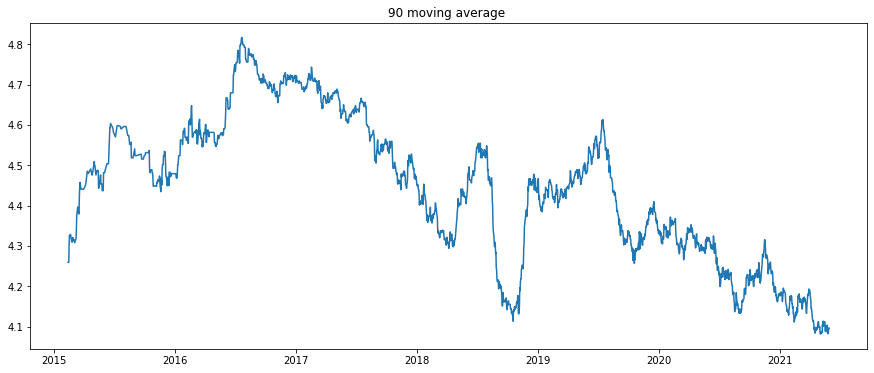

In [15]:
days = df.groupby('date').mean()['rating']
plt.figure(figsize=(15,6))
plt.title('90 moving average ')
plt.plot(days.index[90:], days.rolling(90).mean()[90:])
plt.show()

In [16]:
df

,id,text,date,title,rating
0,un0,\n There were huge soot rings around indoor X...,2021-01-18 00:00:00,They really smoke and cascade wax,1
1,un0,\n I think the color is beautiful. My only i...,2021-04-08 00:00:00,wick was short,2
2,un0,\n Don't waste your money on these candles. T...,2020-12-29 00:00:00,Really only get 2/3 of the candle before it's ...,1
3,un0,\n 35 hours? A day and a half? Are they outsi...,2020-12-24 00:00:00,Don't. Just Don't. False advertising.,1
4,un0,\n We recently went through an ice-pocalypse ...,2021-02-28 00:00:00,Great candles,5
...,...,...,...,...,...
9178,un15,\n Love the style and color\n,2021-04-01 00:00:00,Loved it for our bedroom,5
9179,un15,\n En la foto se ven grandes pero en realidad...,2020-12-08 00:00:00,Lindas!!,5
9180,un15,\n Originally xmas decor. But they look so go...,2021-02-25 00:00:00,A brilliant choice for my surroundings,5
9181,un15,\n Really good product and very fast delivery.\n,2020-11-20 00:00:00,Great Seller,5


In [17]:
df = df.dropna()
df.to_csv(path_or_buf='/content/drive/My Drive/MODS208/Datasets/US_Unscented_Candles.csv', index=False)